
## Volume 2: OpenGym



<Name\>
<Class\>
<Date\>





**Note:** Some IPython notebook platforms (such as Google Colab) do not currently support rendering OpenAI environments. In order to properly render the OpenGym environments in this lab, you may need to run the Jupyter Notebook locally (for example, run it in VSCode or from the command line).

In [33]:
pip install pygame

     |████████████████████████████████| 8.9 MB 4.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [41]:
import gym
from gym import envs
import numpy as np
from IPython.display import clear_output
import random
from matplotlib import pyplot as plt

**Problem 1**

*   Implement `random_blackjack()`.
*   Run the game 500 times and output the percentage of games that are wins.



In [42]:
# Problem 1
def random_blackjack(n):
    """
    Play a random game of Blackjack. Determine the
    percentage the player wins out of n times.
    Parameters:
        n (int): number of iterations
    Returns:
        percent (float): percentage that the player
                         wins
    """
    wins = 0
    for i in range(n):
        env = gym.make("Blackjack-v1")
        observation = env.reset()
        done = False

        while not done:
            observation = env.step(env.action_space.sample())
            #print(observation)
            done = observation[2]
        if observation[1] ==1: wins += 1
    env.close()
    return wins/n



In [43]:
# Run the game here
random_blackjack(500)

0.268

**Problem 2**

* Implement `blackjack()`.
* For `n` = 1, 2, ..., 21, plot the win percentage after 10,000 games of Blackjack.
* Identify which value of `n` gives the highest win rate.

In [44]:
# Problem 2
def blackjack(n=11):
    """
    Play blackjack with naive algorithm.
    Parameters:
        n (int): maximum accepted player hand
    Return:
        percent (float): percentage of 10000 iterations
                         that the player wins
    """
    wins = 0
    for i in range(n):
        env = gym.make("Blackjack-v1")
        observation = env.reset()
        done = False
        while not done:
            observation = env.step(1)
            #print(observation)
            done = observation[0][0] >= n
            if done:
                observation = env.step(0)
        if observation[1] == 1: wins += 1
    env.close()
    return wins/n

[0.2882, 0.28425, 0.2838333333333333, 0.2887, 0.2913800000000001, 0.2871833333333333, 0.28952857142857136, 0.2877625, 0.2901777777777778, 0.29045, 0.2913272727272727, 0.2936833333333333, 0.29608461538461545, 0.29654285714285716, 0.29262, 0.29281875, 0.28825294117647055, 0.2808611111111111, 0.2576631578947368, 0.20740999999999998]


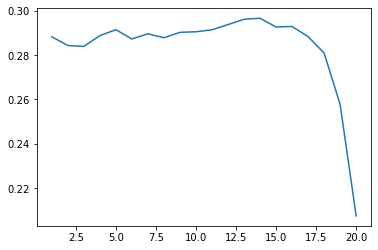

[0.289, 0.2882, 0.2897, 0.286225, 0.29024000000000005, 0.2892333333333334, 0.28868571428571427, 0.2897875, 0.2886444444444445, 0.28663, 0.2916181818181818, 0.29506666666666664, 0.29533846153846155, 0.29548571428571424, 0.2946733333333334, 0.29130625, 0.28761176470588234, 0.28107777777777776, 0.25668421052631574, 0.20759]


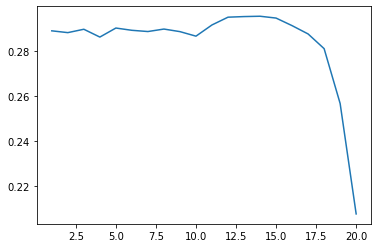

[0.2883, 0.28985, 0.2897, 0.28915, 0.29140000000000005, 0.28905, 0.2879, 0.2879875, 0.2891666666666667, 0.29156, 0.2933272727272727, 0.2920416666666666, 0.2941384615384615, 0.2949, 0.29514, 0.2927125, 0.28874705882352936, 0.2834833333333333, 0.2588894736842105, 0.20891499999999996]


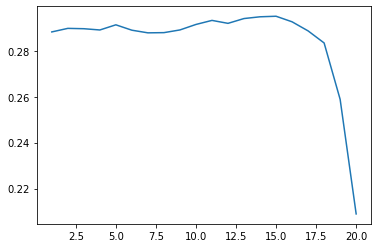

In [46]:
# Plot here
wins = []
ns = [i for i in range(1,21)]
wins = [np.mean([blackjack(i) for n in range(10000)]) for i in ns]
print(wins)
plt.plot(ns,wins, label='wins by stoping number')
plt.show()

*Identify which value(s) give the highest winrate here*

**Problem 3**

* Implement `cartpole()`.
* Render the game and run your function once.
* Run Cartpole 100 times (without rendering) and print out the average number of steps before it terminates.

In [47]:
import math


In [73]:
# Problem 3
import gym
from gym import envs
def cartpole(render=False):
    """
    Solve CartPole-v0 by checking the velocity
    of the tip of the pole.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    env = gym.make('CartPole-v0')
    observation = env.reset()
    done = False
    iters = 0
    dir = 0
    cartpos =0
    angle = observation[3]
    velocity = observation[2]
    if angle > 0:
        dir = 0
    if angle < 0:
        dir = 1
    while np.abs(angle) < 12 and abs(cartpos) < 2.4 and iters < 200:
        if render: env.render()
        observation = env.step(dir)
        cartpos = observation[0][0]
        angle = observation[0][3]
        velocity = observation[0][2]
        if angle < 0:
            dir = 0
        if angle > 0:
            dir = 1
        pv = velocity
        pa = angle
        iters+=1
    return iters


In [74]:
# Render the game and run once here
cartpole(False)

/Users/sean/opt/anaconda3/lib/python3.8/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(


200

200

140

In [75]:
# Run the game here and print average stepso termination
ave = np.mean([cartpole() for i in range (100)])
ave


176.0

186.5

181.7

**Problem 4**

* Implement `car()`.
* Render the game and run your function once.
* Run MountainCar 100 times (without rendering) and print out the average number of steps before it terminates.

In [76]:
# Problem 4
import gym
def car(render=False):
    """
    Solve MountainCar-v0 by checking the position
    of the car.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    env = gym.make("MountainCar-v0")
    pos, pv = env.reset()
    dir = 0
    done = False
    its = 0
    while not done:
        if render: env.render()
        ob = env.step((dir))
        pos, vel = ob[0]
        done =  ob[2]
        its +=1
        pv = vel
        if vel < 0:
            dir = 0
        else: dir = 2
        #print(pos, vel)
    return its


In [77]:
# Render the game here
car(False)

155

87

154

In [78]:
# Run the game here and print average steps to termination
ave = np.mean([car() for i in range (100)])
ave

131.32

126.59

125.43

**Helper Function for Problem 5**

In [79]:
def find_qvalues(env,alpha=.1,gamma=.6,epsilon=.1):
    """
    Use the Q-learning algorithm to find qvalues.
    Parameters:
        env (str): environment name
        alpha (float): learning rate
        gamma (float): discount factor
        epsilon (float): maximum value
    Returns:
        q_table (ndarray nxm)
    """
    # Make environment
    env = gym.make(env)
    # Make Q-table
    q_table = np.zeros((env.observation_space.n,env.action_space.n))

    # Train
    for i in range(1,100001):
        # Reset state
        state = env.reset()

        epochs, penalties, reward, = 0,0,0
        done = False

        while not done:
            # Accept based on alpha
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Take action
            next_state, reward, done, info = env.step(action)

            # Calculate new qvalue
            old_value = q_table[state,action]
            next_max = np.max(q_table[next_state])

            new_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            # Check if penalty is made
            if reward == -10:
                penalties += 1

            # Get next observation
            state = next_state
            epochs += 1

        # Print episode number
        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.")
    return q_table


**Problem 5**

* Render the "`Taxi-v3`" environment, act randomly until it terminates, and calculate the total reward
* Render the "`Taxi-v3`" environment, use the Q-table to act optimally until it terminates, and calculate the total reward
* Implement `taxi()`, then use it to print the average total reward for each algorithm.


In [80]:
# Random actions Taxi game

In [81]:
def ranTaxi():
    env = gym.make("Taxi-v3")
    observation = env.reset()
    done = False
    reward =0
    while not done:
        observation, rewardAdd, done,info = env.step(    env.action_space.sample())
        reward += rewardAdd
    return reward



In [82]:
# Q-table actions Taxi game
q_table = find_qvalues("Taxi-v3")

Episode: 100000
Training finished.


In [86]:
import gym
def taxi(q_table):
    """
    Compare naive and q-learning algorithms.
    Parameters:
        q_table (ndarray nxm): table of qvalues
    Returns:
        naive (float): mean reward of naive algorithm
                       of 10000 runs
        q_reward (float): mean reward of Q-learning algorithm
                          of 10000 runs
    """
    env = gym.make("Taxi-v3")
    observation = env.reset()
    action = np.argmax(q_table[observation,:])
    done1 = False
    reward1 = 0
    while not done1:
        env.render()
        observation, reward1add, done1,info = env.step((action))
        action = np.argmax(q_table[observation,:])
        reward1 += reward1add

    reward2 =ranTaxi()
    #print(reward1, reward2)
    return reward1, reward2





In [87]:
taxi(q_table)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


(14, -740)

In [85]:
# Print the average rewards of the Taxi game for both algorithms run 10,000 times
ave = np.array([np.array(taxi(q_table)) for i in range (10000)])
ave1 = np.mean(ave[:,0])
ave2 = np.mean(ave[:,1])
ave1, ave2

(7.974, -771.4294)

(7.9552, -771.6891)

(7.9199, -769.809)